<a href="https://colab.research.google.com/github/KratosChi/NLP-Text-Generation/blob/main/Blockchain_for_Dental_Material_counterfeiting_True.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import hashlib
import time
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes, serialization

class DentalMaterialBlock:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}"
        return hashlib.sha256(block_string.encode()).hexdigest()

class DentalMaterialBlockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]

    def create_genesis_block(self):
        return DentalMaterialBlock(0, time.time(), "Genesis Block", "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.hash = new_block.calculate_hash()
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i-1]

            if current_block.hash != current_block.calculate_hash():
                return False

            if current_block.previous_hash != previous_block.hash:
                return False

        return True

def generate_keypair():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048
    )
    public_key = private_key.public_key()
    return private_key, public_key

def sign_data(private_key, data):
    signature = private_key.sign(
        data.encode(),
        padding.PSS(
            mgf=padding.MGF1(hashes.SHA256()),
            salt_length=padding.PSS.MAX_LENGTH
        ),
        hashes.SHA256()
    )
    return signature

def verify_signature(public_key, signature, data):
    try:
        public_key.verify(
            signature,
            data.encode(),
            padding.PSS(
                mgf=padding.MGF1(hashes.SHA256()),
                salt_length=padding.PSS.MAX_LENGTH
            ),
            hashes.SHA256()
        )
        return True
    except:
        return False

# Usage example
blockchain = DentalMaterialBlockchain()

# Generate keypair for manufacturer
manufacturer_private_key, manufacturer_public_key = generate_keypair()

# Manufacturer creates a new dental material batch
batch_id = "DM001"
material_type = "Composite Resin"
manufacture_date = "2025-03-17"
expiry_date = "2027-03-17"

material_data = f"{batch_id}:{material_type}:{manufacture_date}:{expiry_date}"
signature = sign_data(manufacturer_private_key, material_data)

# Add the material data and signature to the blockchain
new_block = DentalMaterialBlock(
    index=len(blockchain.chain),
    timestamp=time.time(),
    data={
        "material_data": material_data,
        "signature": signature,
        "public_key": manufacturer_public_key.public_bytes(
            encoding=serialization.Encoding.PEM,
            format=serialization.PublicFormat.SubjectPublicKeyInfo
        )
    },
    previous_hash=blockchain.get_latest_block().hash
)

blockchain.add_block(new_block)

# Verify the blockchain
print("Is blockchain valid?", blockchain.is_chain_valid())

# Later, when verifying the authenticity of the dental material:
latest_block = blockchain

Is blockchain valid? True


<ipython-input-3-8f1cfb375894>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


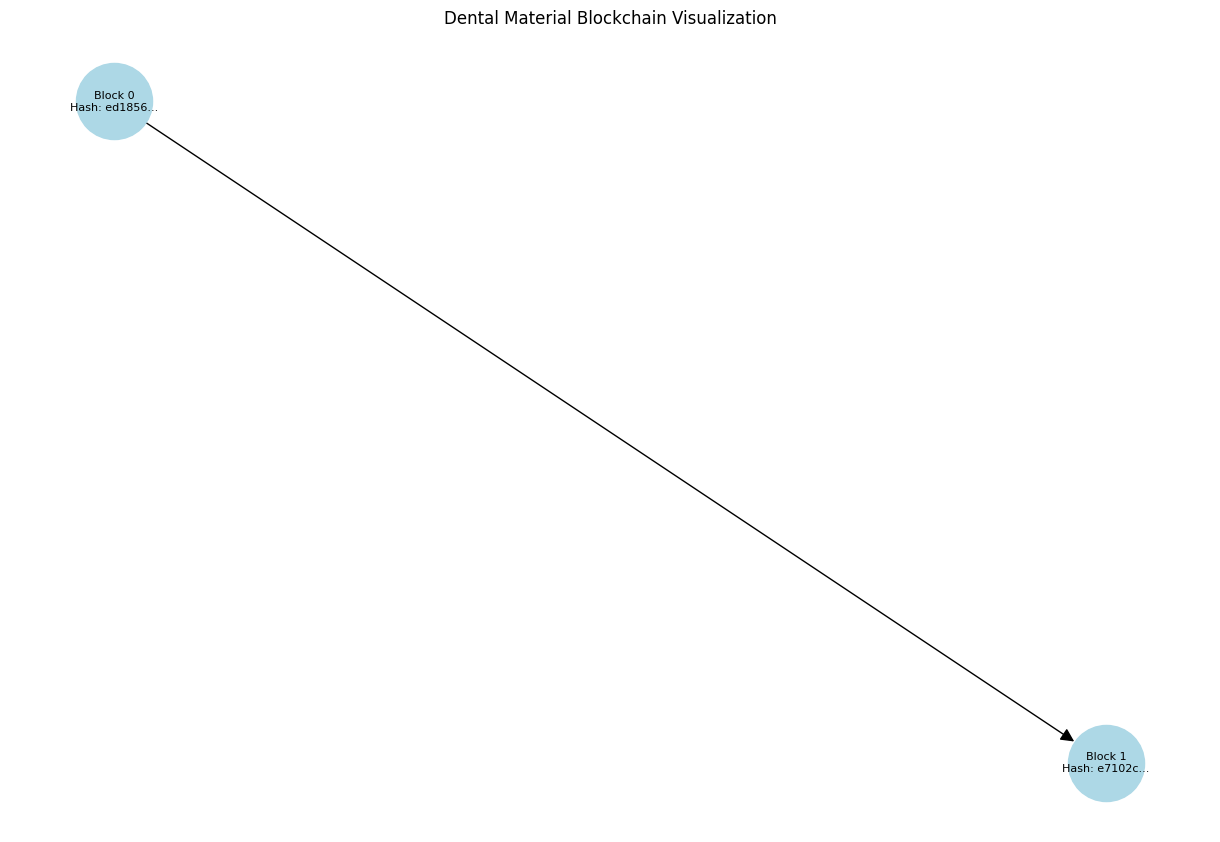


Blockchain Details:

Block 0:
  Timestamp: 1742193424.6698825
  Previous Hash: 0
  Hash: ed1856ba3307589435c1caa300e3fedcd33a48c99e249720f48f28bbf20f9f7c

Block 1:
  Timestamp: 1742193424.7294817
  Previous Hash: ed1856ba3307589435c1caa300e3fedcd33a48c99e249720f48f28bbf20f9f7c
  Hash: e7102ca193241401dd2265f6bcdd0373216a26f1fb3728fc585dd9ca033ae3bc
  Material Data: DM001:Composite Resin:2025-03-17:2027-03-17


In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# First, make sure to run all the previous blockchain code

def visualize_blockchain(blockchain):
    G = nx.DiGraph()

    for i, block in enumerate(blockchain.chain):
        G.add_node(i, label=f"Block {i}\nHash: {block.hash[:6]}...")
        if i > 0:
            G.add_edge(i-1, i)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=3000, arrowsize=20, font_size=8,
            labels={node: G.nodes[node]['label'] for node in G.nodes()})

    plt.title("Dental Material Blockchain Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Display additional information
    print("\nBlockchain Details:")
    for i, block in enumerate(blockchain.chain):
        print(f"\nBlock {i}:")
        print(f"  Timestamp: {block.timestamp}")
        print(f"  Previous Hash: {block.previous_hash}")
        print(f"  Hash: {block.hash}")
        if i > 0:  # Skip genesis block
            print(f"  Material Data: {block.data['material_data']}")

# After creating and adding blocks to your blockchain, call this function:
visualize_blockchain(blockchain)

In [4]:
pip install matplotlib networkx

In [5]:
import datetime
import numpy as np
from collections import defaultdict

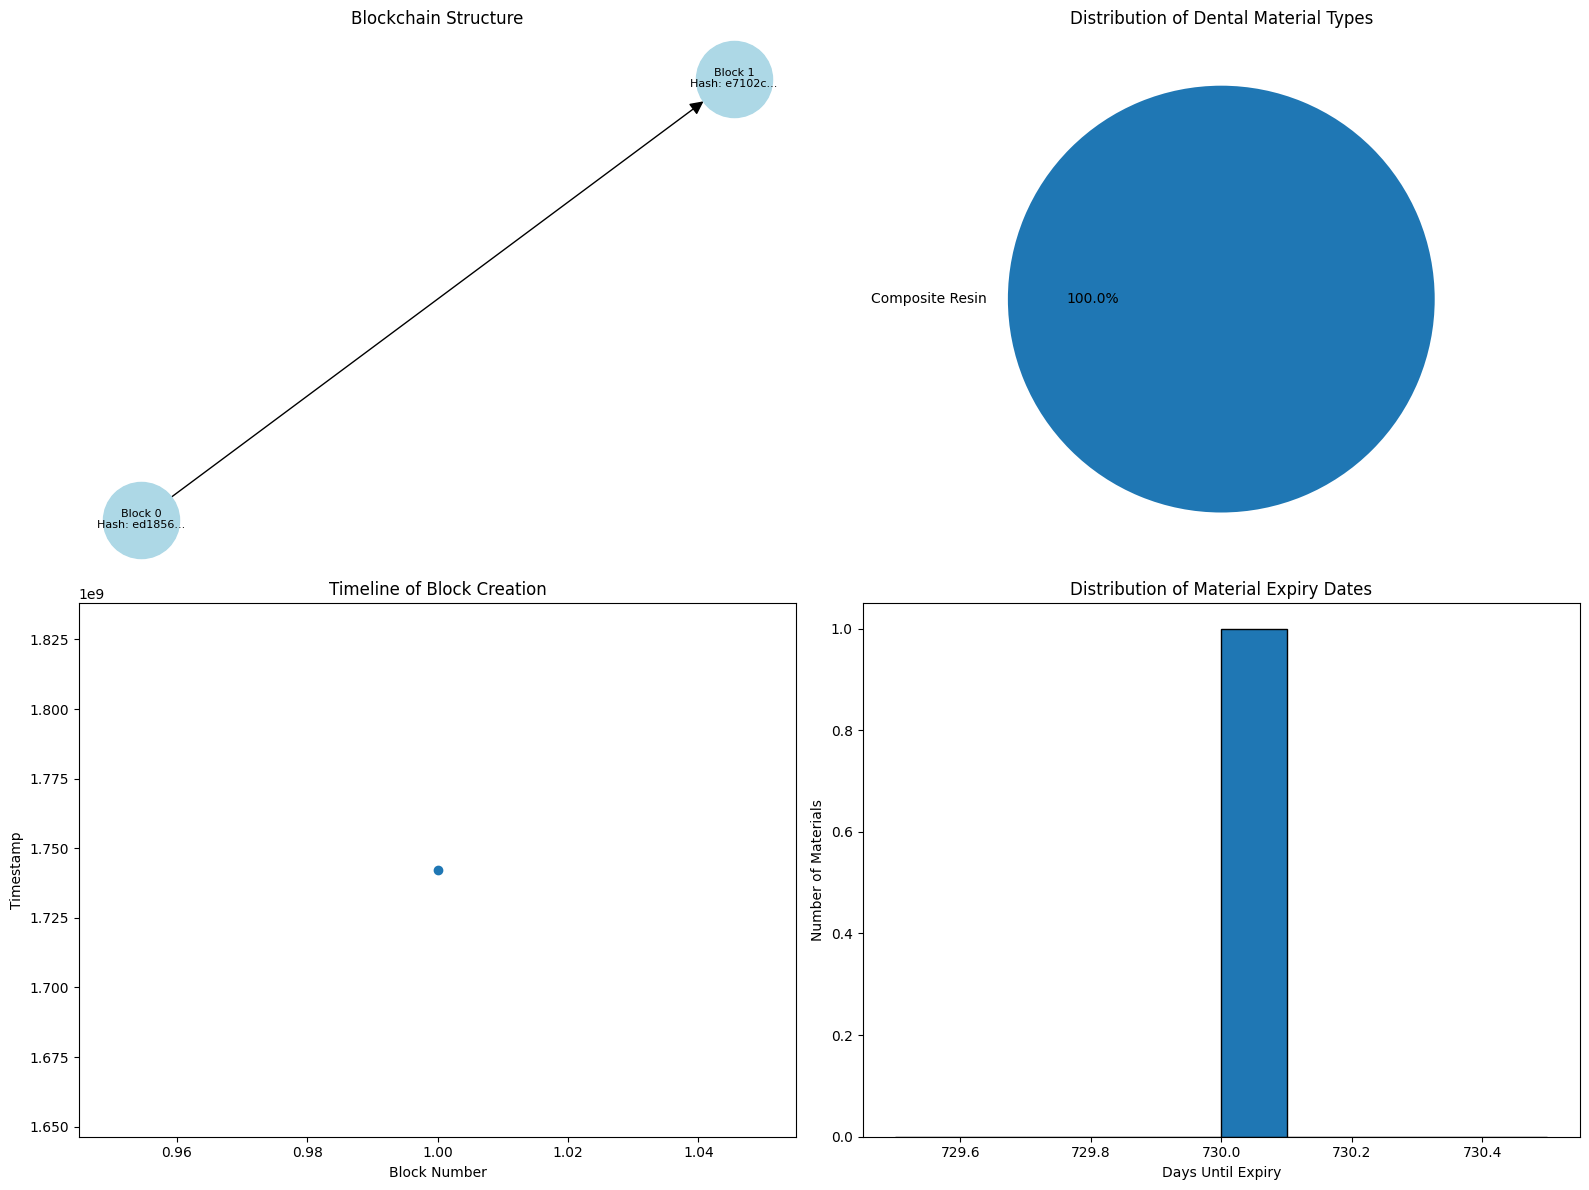


Blockchain Summary:
Total number of blocks: 2
Types of dental materials: Composite Resin
Most common material type: Composite Resin
Average time between blocks: 0.00 seconds


In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import datetime

def visualize_blockchain_extended(blockchain):
    # 1. Blockchain Structure Visualization
    G = nx.DiGraph()
    for i, block in enumerate(blockchain.chain):
        G.add_node(i, label=f"Block {i}\nHash: {block.hash[:6]}...")
        if i > 0:
            G.add_edge(i-1, i)

    plt.figure(figsize=(16, 12))
    plt.subplot(221)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=3000, arrowsize=20, font_size=8,
            labels={node: G.nodes[node]['label'] for node in G.nodes()})
    plt.title("Blockchain Structure")
    plt.axis('off')

    # 2. Material Type Distribution
    material_types = defaultdict(int)
    for block in blockchain.chain[1:]:  # Skip genesis block
        material_data = block.data['material_data'].split(':')
        material_type = material_data[1]
        material_types[material_type] += 1

    plt.subplot(222)
    plt.pie(material_types.values(), labels=material_types.keys(), autopct='%1.1f%%')
    plt.title("Distribution of Dental Material Types")

    # 3. Timeline of Block Creation
    timestamps = [block.timestamp for block in blockchain.chain[1:]]  # Skip genesis block
    block_numbers = range(1, len(blockchain.chain))

    plt.subplot(223)
    plt.plot(block_numbers, timestamps, marker='o')
    plt.xlabel("Block Number")
    plt.ylabel("Timestamp")
    plt.title("Timeline of Block Creation")

    # 4. Expiry Date Analysis
    current_date = datetime.datetime(2025, 3, 17)  # Using the date you provided
    expiry_dates = []
    for block in blockchain.chain[1:]:  # Skip genesis block
        material_data = block.data['material_data'].split(':')
        expiry_date = datetime.datetime.strptime(material_data[3], "%Y-%m-%d")
        days_until_expiry = (expiry_date - current_date).days
        expiry_dates.append(days_until_expiry)

    plt.subplot(224)
    plt.hist(expiry_dates, bins=10, edgecolor='black')
    plt.xlabel("Days Until Expiry")
    plt.ylabel("Number of Materials")
    plt.title("Distribution of Material Expiry Dates")

    plt.tight_layout()
    plt.show()

    # Additional console output
    print("\nBlockchain Summary:")
    print(f"Total number of blocks: {len(blockchain.chain)}")
    print(f"Types of dental materials: {', '.join(material_types.keys())}")
    print(f"Most common material type: {max(material_types, key=material_types.get)}")
    print(f"Average time between blocks: {sum(np.diff(timestamps)) / len(timestamps):.2f} seconds")

# After creating and adding blocks to your blockchain, call this function:
visualize_blockchain_extended(blockchain)